### Aykırı Değer
Yapay zeka modeli eğitirken veri setinde normal değerlere uymayan değerler bulunabilir.Bu değerlere aykırı değerler denir.

Outlier problemi çeşitli sebeplerden kaynaklanabilmektedir. Bunlardan önde gelenleri şöyledir.

 - Veri toplama ve ölçüm aracında oluşan teknik problemler.
 - Verilerin problemi temsil edecek bütün olası durumları kapsayacak şekilde
toplanmamış olması.
 - İnsan hatası içeren veriler ile veri seti oluşturulması.
 - Bilimsel ve teknik olarak hatalı veri seti oluşturma işlemleri.
 - Verilerin daha dar bir ortamdan toplandığı halde geniş bir kapsama uygulanmaya
çalışılması.
```python
import matplotlib.pyplot as plt
veri = [1,2,3,4,2,3,4,5,20,23,-10]
index = list(range(len(veri)))

plt.scatter(index,veri, marker="*",color="red")
plt.show()
```
Kodu çalıştırıp aykırı değerleri görelim.

### Kutu Grafiği
Aykırı değerlerin tespitinde kullanılan yöntemlerden biride kutu grafikleridir. Kutu grafikleri IRQ algoritmasını kullanarak çizdirilir.


```python
import matplotlib.pyplot as plt
veri = [1,2,3,4,2,3,4,5,20,23,-10]
index = list(range(len(veri)))

plt.boxplot(veri)
plt.ylabel("degerler")
plt.grid(True)
plt.show()
```
![](assets/kutu-grafigi.png)

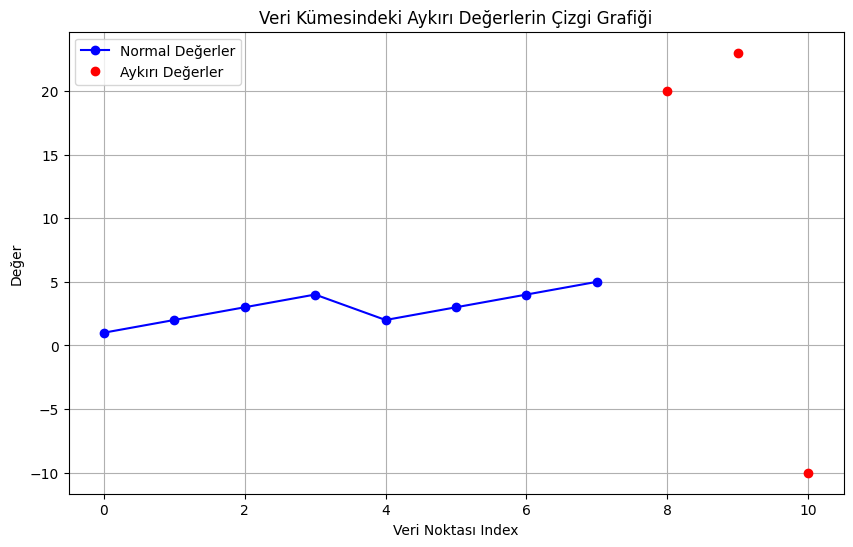

In [12]:
import matplotlib.pyplot as plt
import numpy as np

# Örnek veri
data = [1, 2, 3, 4, 2, 3, 4, 5, 20, 23, -10]

# Veriyi numpy array olarak dönüştür
data = np.array(data)

# Aykırı değerleri belirle
Q1 = np.percentile(data, 25)
Q3 = np.percentile(data, 75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Aykırı değerler
outliers = data[(data < lower_bound) | (data > upper_bound)]

# Normal değerler
normal_values = data[(data >= lower_bound) & (data <= upper_bound)]

# Normal ve aykırı değerleri çizgi grafiğinde göster
plt.figure(figsize=(10, 6))

# Normal değerler için çizgi grafiği
plt.plot(np.arange(len(normal_values)), normal_values, 'bo-', label='Normal Değerler')

# Aykırı değerler için çizgi grafiği
plt.plot(np.arange(len(normal_values), len(normal_values) + len(outliers)), outliers, 'ro', label='Aykırı Değerler')

plt.title('Veri Kümesindeki Aykırı Değerlerin Çizgi Grafiği')
plt.xlabel('Veri Noktası Index')
plt.ylabel('Değer')
plt.legend()
plt.grid(True)
plt.show()


### Histogram Gösterimi

```python
import matplotlib.pyplot as plt

plt.hist(veri)
plt.savefig("assets/histogram.png")
plt.show()
```
![](assets/histogram.png)

### Aykırı Değerlerin Tespitinde Kulllanılan Yöntemler

**Veri Kümesinde Aykırı Değerleri Yorumlama :** https://www.youtube.com/watch?v=njoI0GB56EI

**Dağılım Ölçüleri Olarak Açıklık, Varyans ve Standart Sapma:** https://www.youtube.com/watch?v=cr6tnjvzFGY  

**İstatistik: Standart Sapma:** https://www.youtube.com/watch?v=KUBNXl8VAN4  

**Z-Değerine Giriş:** https://www.youtube.com/watch?v=HgYA4uJgqH0  


### 1. **Z-Skoru Yöntemi**

**Z-skoru**, bir veri noktasının ortalamadan ne kadar uzaklaştığını standart sapma cinsinden ölçen bir istatistiktir. Aykırı değerleri tespit etmek için z-skoru yöntemi kullanılır:

- **Formül:** 

$$ z = \frac{(X - \mu)}{\sigma}$$
  Burada:
  
  -  X = Veri noktası
  -  $\mu$ = Ortalama
  - $\sigma$ = Standart sapma
- **Yorumlama:** 
  - Genellikle, z-skoru mutlak değeri 2 veya 3'ün üzerinde olan değerler aykırı olarak kabul edilir. Yani, veri noktaları ortalamadan 2 veya 3 standart sapmadan daha uzaksa aykırı değerler olarak işaretlenir.

- **Avantajlar:** 
  - Basit ve hızlıdır.
  - Veri kümesinin dağılımı hakkında bilgi verir.

- **Dezavantajlar:**
  - Z-skoru yöntemi, özellikle veri kümesinin normal dağılım gösterdiği varsayımı altında daha etkilidir. Normal dağılım göstermeyen verilerde z-skoru yöntemi yanıltıcı olabilir.

### 2. **Interquartile Range (IQR) Yöntemi**

**IQR** (Çeyrekler Arası Mesafe), veri kümesinin ortasındaki 50%'lik kısmı kapsar ve aykırı değerlerin belirlenmesinde kullanılır:

- **Formül:**
  - **Q1 (Birinci Çeyrek):** Verilerin %25'inin altında olduğu değer.
  - **Q3 (Üçüncü Çeyrek):** Verilerin %75'inin altında olduğu değer.
  - **IQR = Q3 - Q1**

  Aykırı değerler, IQR hesaplanarak şu şekilde belirlenir:
  - **Alt sınır = Q1 - 1.5 * IQR**
  - **Üst sınır = Q3 + 1.5 * IQR**

- **Yorumlama:**
  - Alt ve üst sınırların dışında kalan veriler aykırı değerler olarak kabul edilir.

- **Avantajlar:**
  - Dağılımdan bağımsızdır ve veri kümesinin çeyrekler arasındaki yayılımı kullanır.
  - Normal dağılım varsayımına ihtiyaç duymaz.

- **Dezavantajlar:**
  - Aykırı değerlerin sayısını belirlemek zor olabilir ve küçük veri kümesinde yanlış sonuçlar verebilir.

### 3. **Hipotez Testleri**

**Hipotez testleri**, veri kümesindeki aykırı değerlerin var olup olmadığını test etmek için istatistiksel testler sunar. Aykırı değerlerin tespitinde kullanılan bazı hipotez testleri şunlardır:

- **Grubbs Testi:**
  - Tek bir aykırı değeri belirlemek için kullanılır.
  - Test, en yüksek ve en düşük değerlerin veri kümesinin ortalamasından ne kadar uzak olduğunu değerlendirir.

- **Dixon'un Q Testi:**
  - Küçük veri kümelerinde aykırı değerlerin belirlenmesi için kullanılır.
  - Test, en yüksek veya en düşük değerin veri kümesinin diğer değerlerinden ne kadar uzak olduğunu değerlendirir.

- **Generalized Extreme Studentized Deviate (GESD) Testi:**
  - Birden fazla aykırı değeri belirlemek için kullanılır.
  - Aykırı değerlerin etkisini azaltmak için veriyi tekrar analiz eder.

- **Avantajlar:**
  - İstatistiksel olarak güçlüdür ve belirli testlere dayanır.
  - Aykırı değerlerin doğruluğunu istatistiksel olarak değerlendirir.

- **Dezavantajlar:**
  - İstatistiksel bilgi gerektirir ve bazı testler küçük veri kümesi için geçerli olmayabilir.
  - Uygulama ve yorumlama açısından daha karmaşık olabilir.

### Sonuç

- **Z-Skoru:** Normal dağılım varsayımı altında etkili ve hızlıdır.
- **IQR:** Dağılımdan bağımsızdır ve daha geniş veri kümesinde kullanılır.
- **Hipotez Testleri:** İstatistiksel testler kullanarak aykırı değerlerin doğruluğunu değerlendirir.

Bu yöntemler, veri analizi sürecinde aykırı değerlerin tespit edilmesinde çeşitli avantajlar ve dezavantajlar sunar. Kullanım amacınıza ve veri kümenizin özelliklerine bağlı olarak en uygun yöntemi seçebilirsiniz.

### Aykırı Değer Filtreleme


In [11]:
import pandas as pd
from sklearn import datasets
import matplotlib.pyplot as plt

X,y = datasets.load_diabetes(return_X_y=True,as_frame=True)
X,y


(          age       sex       bmi        bp        s1        s2        s3  \
 0    0.038076  0.050680  0.061696  0.021872 -0.044223 -0.034821 -0.043401   
 1   -0.001882 -0.044642 -0.051474 -0.026328 -0.008449 -0.019163  0.074412   
 2    0.085299  0.050680  0.044451 -0.005670 -0.045599 -0.034194 -0.032356   
 3   -0.089063 -0.044642 -0.011595 -0.036656  0.012191  0.024991 -0.036038   
 4    0.005383 -0.044642 -0.036385  0.021872  0.003935  0.015596  0.008142   
 ..        ...       ...       ...       ...       ...       ...       ...   
 437  0.041708  0.050680  0.019662  0.059744 -0.005697 -0.002566 -0.028674   
 438 -0.005515  0.050680 -0.015906 -0.067642  0.049341  0.079165 -0.028674   
 439  0.041708  0.050680 -0.015906  0.017293 -0.037344 -0.013840 -0.024993   
 440 -0.045472 -0.044642  0.039062  0.001215  0.016318  0.015283 -0.028674   
 441 -0.045472 -0.044642 -0.073030 -0.081413  0.083740  0.027809  0.173816   
 
            s4        s5        s6  
 0   -0.002592  0.019907 

<Figure size 1000x1000 with 0 Axes>

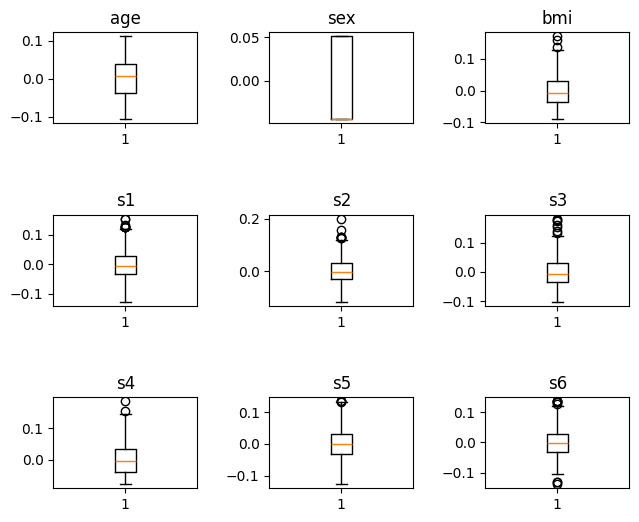

In [27]:

plt.figure(figsize=(10,10))
fig,axis = plt.subplots(3,3)

axis[0,0].boxplot(X.age)
axis[0,0].set_title("age")

axis[0,1].boxplot(X.sex)
axis[0,1].set_title("sex")

axis[0,2].boxplot(X.bmi)
axis[0,2].set_title("bmi")

axis[1,0].boxplot(X.s1)
axis[1,0].set_title("s1")

axis[1,1].boxplot(X.s2)
axis[1,1].set_title("s2")

axis[1,2].boxplot(X.s3)
axis[1,2].set_title("s3")

axis[2,0].boxplot(X.s4)
axis[2,0].set_title("s4")

axis[2,1].boxplot(X.s5)
axis[2,1].set_title("s5")

axis[2,2].boxplot(X.s6)
axis[2,2].set_title("s6")

fig.subplots_adjust(left=0.08, right=0.98, bottom=0.05, top=1,
                    hspace=1, wspace=0.5)
plt.show()